In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
df = pd.read_csv('Datasets/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

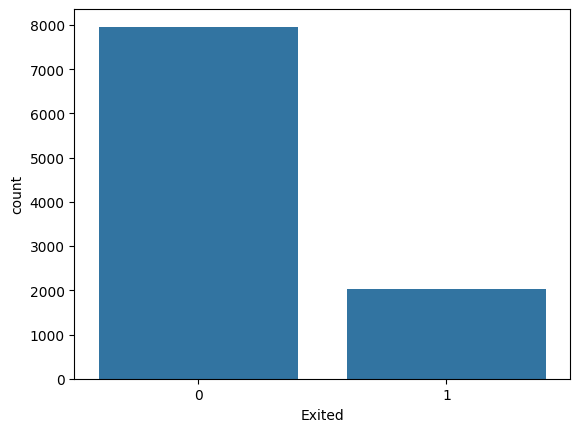

In [16]:
sns.countplot(data=df, x='Exited')

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [21]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
log = LogisticRegression()

log.fit(X_train, y_train)

y_pred = log.predict(X_test)

accuracy_score(y_test, y_pred)

0.7837413684871312

In [26]:
precision_score(y_test, y_pred)


0.7723833543505675

In [27]:
recall_score(y_test, y_pred)

0.7887958789439794

In [28]:
f1_score(y_test, y_pred)

0.7805033450143358

In [30]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8361581920903954

In [31]:
precision_score(y_test, y_pred2)

0.8281349458943348

In [32]:
recall_score(y_test, y_pred2)

0.8377334191886671

In [33]:
f1_score(y_test, y_pred2)

0.8329065300896287

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

0.822661644695543

In [35]:
precision_score(y_test, y_pred3)

0.8060718711276332

In [36]:
recall_score(y_test, y_pred3)

0.8377334191886671

In [38]:
f1_score(y_test, y_pred3)

0.8215977265550994

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7947269303201506

In [43]:
precision_score(y_test, y_pred4)

0.7719298245614035

In [44]:
recall_score(y_test, y_pred4)

0.8216355441081777

In [45]:
f1_score(y_test, y_pred4)

0.7960074859638179

In [46]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred5 = rf.predict(X_test)

accuracy_score(y_test, y_pred5)

0.8631512868801005

In [47]:
precision_score(y_test, y_pred5)

0.8532574320050601

In [48]:
recall_score(y_test, y_pred5)

0.8686413393432066

In [49]:
f1_score(y_test, y_pred5)

0.8608806636885769

In [50]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred6 = gbc.predict(X_test)

accuracy_score(y_test, y_pred6)

0.839924670433145

In [51]:
precision_score(y_test, y_pred6)

0.8384166125892277

In [52]:
recall_score(y_test, y_pred6)

0.8319381841596909

In [53]:
f1_score(y_test, y_pred6)

0.8351648351648352

In [59]:
final_data = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred2),
                                  accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                  accuracy_score(y_test, y_pred5),
                                  accuracy_score(y_test, y_pred6)]})

In [60]:
final_data

,Model,ACC
0,LR,0.783741
1,SVC,0.836158
2,KNN,0.822662
3,DT,0.794727
4,RF,0.863151
5,GBC,0.839925


<Axes: xlabel='Model', ylabel='ACC'>

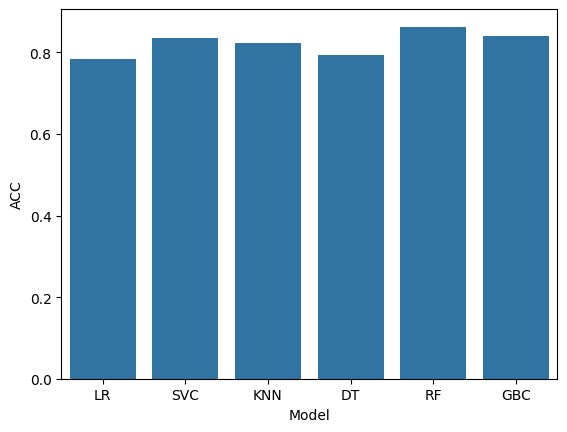

In [67]:
sns.barplot(data=final_data, x='Model',y='ACC')

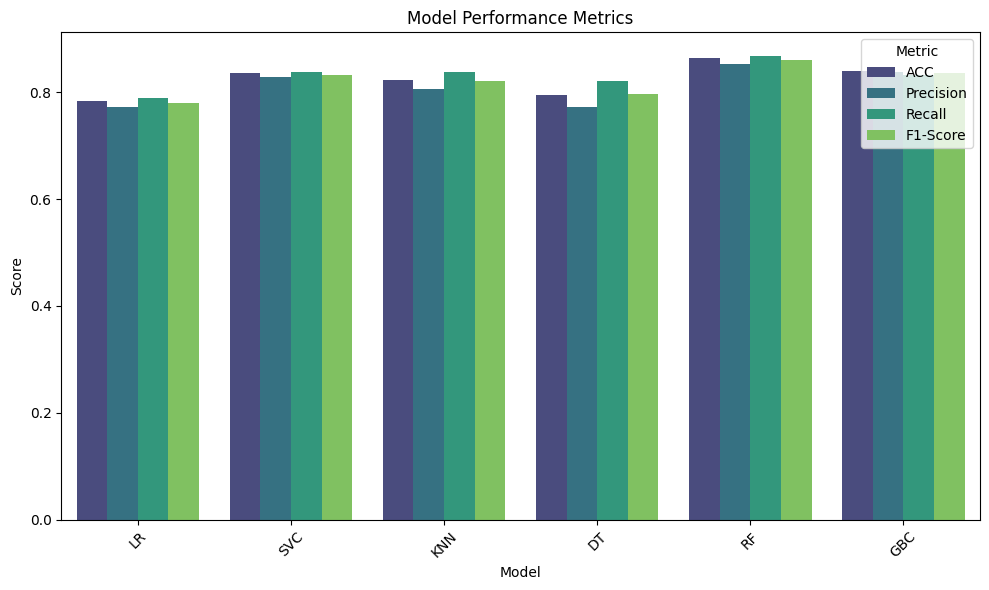

In [72]:
metrics = {
    'Model': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3),
        precision_score(y_test, y_pred4),
        precision_score(y_test, y_pred5),
        precision_score(y_test, y_pred6)
    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred2),
        recall_score(y_test, y_pred3),
        recall_score(y_test, y_pred4),
        recall_score(y_test, y_pred5),
        recall_score(y_test, y_pred6)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred2),
        f1_score(y_test, y_pred3),
        f1_score(y_test, y_pred4),
        f1_score(y_test, y_pred5),
        f1_score(y_test, y_pred6)
    ]
}

# Create the DataFrame
final_data = pd.DataFrame(metrics)

# Reshape the DataFrame to long format
final_data_long = pd.melt(final_data, id_vars=['Model'], var_name='Metric', value_name='Value')

# Create bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=final_data_long, palette='viridis')

# Customize the plot
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [74]:
final_data_long

,Model,Metric,Value
0,LR,ACC,0.783741
1,SVC,ACC,0.836158
2,KNN,ACC,0.822662
3,DT,ACC,0.794727
4,RF,ACC,0.863151
5,GBC,ACC,0.839925
6,LR,Precision,0.772383
7,SVC,Precision,0.828135
8,KNN,Precision,0.806072
9,DT,Precision,0.771930


In [75]:
X_res = sc.fit_transform(X_res)
rf.fit(X_res, y_res)

RandomForestClassifier()

In [77]:
joblib.dump(rf, 'joblib/churn_predict_joblib')

['churn_predict_joblib']

In [78]:
model = joblib.load('churn_predict_joblib')

In [ ]:
model.predict([[]])